# Wine Datası İçin Tahmin 

## Kullanılacak Modüllerin İmport Edilmesi

In [2]:
import pandas as pd
import seaborn as sn
from pandas import read_csv
from pandas import set_option
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

## Verinin Okutularak Bölünmesi

In [3]:
columnNames= ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
otherCols=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
df = pd.read_csv("wine.data",names =columnNames)
X=df[otherCols]
Y=df["Class"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

## Verinin İncelenmesi

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   
5      1    14.20        1.76  2.45               15.2        112   
6      1    14.39        1.87  2.45               14.6         96   
7      1    14.06        2.15  2.61               17.6        121   
8      1    14.83        1.64  2.17               14.0         97   
9      1    13.86        1.35  2.27               16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.2

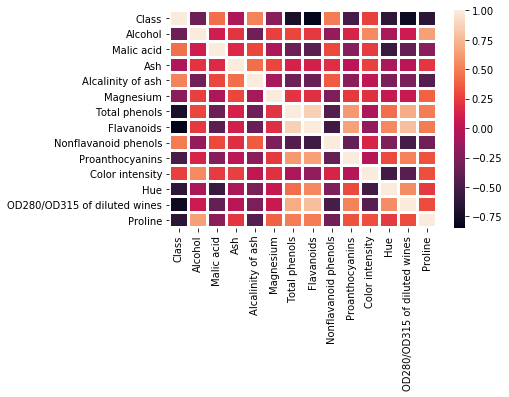

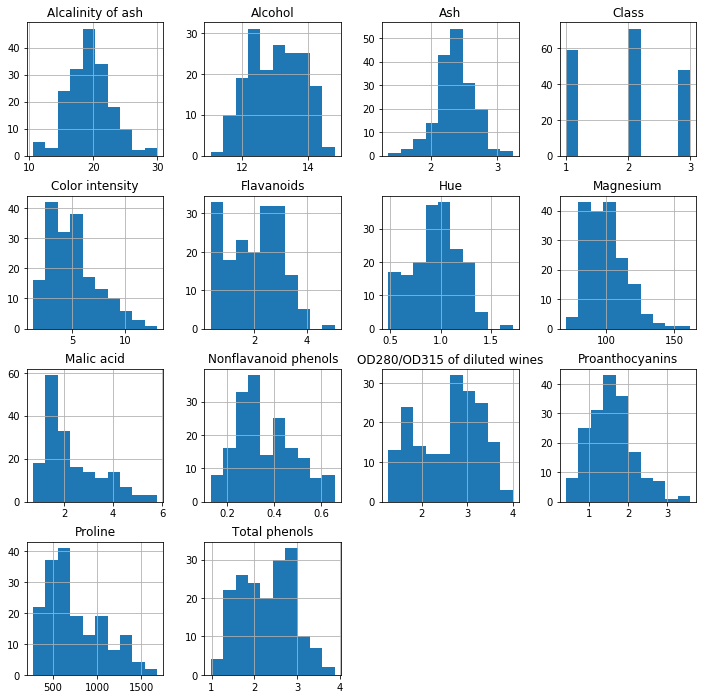

---------------------------------------------------------------------------------------------------- 
 **************************************************************************************************** 
 ----------------------------------------------------------------------------------------------------


In [4]:
#Verimiziz 10 satırını yazdırarak datamızı anlamaya çalışıyoruz
peek=df.head(10)
print(peek)
print("-"*100,"\n","*"*100,"\n","-"*100)

#Verimizde eksik veri olup olmadığını kontrol ediyoruz
print(df.isnull().sum())
print("-"*100,"\n","*"*100,"\n","-"*100)

#Verimize biraz göz atıp amacımızı anladıktan sonra verimizi istatistiksel olarak inceliyoruz
set_option("display.width",100)
set_option("precision",3)
description = df.describe()
print(description)
print("-"*100,"\n","*"*100,"\n","-"*100)

#Verimizin kolerasyonlarını inceleyerek yüksek kolerasyonlu değişkenleri tespit etmeye çalışıyoruz
set_option("display.width",100)
set_option("precision",3)
corr = df.corr(method="pearson")
print(corr)
print("-"*100,"\n","*"*100,"\n","-"*100)
sn.heatmap(corr,linewidths=2)
print("-"*100,"\n","*"*100,"\n","-"*100)

#Verimizi grafikler üzerinden inceleyip daha iyi anlamaya çalışıyoruz
df.hist(figsize=(12,12))
plt.show()
print("-"*100,"\n","*"*100,"\n","-"*100)

## Normalizasyon işlemi uyguluyoruz

In [5]:
normalizasyon = StandardScaler()
X_train_std = normalizasyon.fit_transform(x_train)
X_test_std=normalizasyon.transform(x_test)

## Logistic Regression Modelini kuruyoruz

In [6]:
LogisticRegModel = LogisticRegression(max_iter =3000).fit(X_train_std,y_train)
LogisticRegTahmin=LogisticRegModel.predict(X_test_std)
LogisticRegTahmin2 =LogisticRegModel.predict(X_train_std)


## Modelimizin Skorunu Öğreniyoruz

In [7]:
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,LogisticRegTahmin)))
print("Precision: "+str(precision_score(y_test, LogisticRegTahmin, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,LogisticRegTahmin, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,LogisticRegTahmin, average = 'weighted')))                                        
print("\n")
print("Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,LogisticRegTahmin)))
print("Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,LogisticRegTahmin2)))


Test verilerine göre :
Doğruluk : 1.0
Precision: 1.0
Recall : 1.0
F1 Puanı : 1.0


Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]
Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]


## Makina Öğrenmesi için en verimli öznitelik seçmesi yapıyoruz

In [8]:
rfe=RFE(LogisticRegModel,5)
fit=rfe.fit(X,Y)
x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)
LogModelWithRFE =  LogisticRegression(max_iter =3000).fit(x_train_2, y_train)

## Seçtiğimiz özniteliklerin sonucuna bakıyoruz 

In [9]:
LogisticRegTahmin =LogModelWithRFE.predict(x_test_2)
LogisticRegTahmin2 =LogModelWithRFE.predict(x_train_2)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,LogisticRegTahmin)))
print("Precision: "+str(precision_score(y_test, LogisticRegTahmin, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,LogisticRegTahmin, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,LogisticRegTahmin, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,LogisticRegTahmin)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,LogisticRegTahmin2)))

Test verilerine göre :
Doğruluk : 0.9814814814814815
Precision: 0.9824074074074074
Recall : 0.9722222222222222
F1 Puanı : 0.981316321896032


Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 11]]
Eğitim Sınıflandırma Tablosu : 
 [[33  3  0]
 [ 4 47  1]
 [ 0  0 36]]


## Öznitelikler seçildikten sonra daha iyi bir sonuç üretebilmek için modelimizi optimize ediyoruz

In [10]:
grid_degerleri = {"C":[0.0001,0.009,0.01,0.05,0.09,1,5,10,25,100]}
LogModelGrid=LogisticRegression(max_iter =3000)
grid_model=GridSearchCV(LogModelGrid,param_grid=grid_degerleri,cv=10,verbose=1)
grid_model.fit(X_train_std,y_train)
print(grid_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 0.05}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


## Optimize edilmiş modelimizi test ediyoruz

In [11]:
y_pred_LogReg=grid_model.predict(X_test_std)
y_pred_train_LogReg=grid_model.predict(X_train_std)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,y_pred_LogReg)))
print("Precision: "+str(precision_score(y_test, y_pred_LogReg, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,y_pred_LogReg, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,y_pred_LogReg, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,y_pred_LogReg)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,y_pred_train_LogReg)))

Test verilerine göre :
Doğruluk : 0.9814814814814815
Precision: 0.9822530864197532
Recall : 0.9824561403508771
F1 Puanı : 0.9814282367473858


Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 51  1]
 [ 0  0 36]]


## Support Vector Machine (SVM) Modelini kuruyoruz

In [12]:
svcClassifier=SVC(kernel ="linear",random_state=0).fit(X_train_std,y_train)


## SVM modelimizin sonuçlarını inceliyoruz

In [13]:
y_pred_svc=svcClassifier.predict(X_test_std)
y_pred_train_svc=svcClassifier.predict(X_train_std)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,y_pred_svc)))
print("Precision: "+str(precision_score(y_test, y_pred_svc, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,y_pred_svc, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,y_pred_svc, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,y_pred_svc)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,y_pred_train_svc)))

Test verilerine göre :
Doğruluk : 0.9814814814814815
Precision: 0.9824074074074074
Recall : 0.9722222222222222
F1 Puanı : 0.981316321896032


Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 11]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]


## En iyi öznitelikleri seçiyoruz

In [14]:
rfe=RFE(svcClassifier,4)
fit=rfe.fit(X,Y)
x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)
svcWithRFE=  svcClassifier.fit(x_train_2, y_train)

## Seçtiğimiz özniteliklerin sonuçlarına bakıyoruz

In [15]:
svcpred=svcWithRFE.predict(x_test_2)
svcpred2 =svcWithRFE.predict(x_train_2)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,svcpred)))
print("Precision: "+str(precision_score(y_test, svcpred, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,svcpred, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,svcpred, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,svcpred)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,svcpred2)))

Test verilerine göre :
Doğruluk : 0.9629629629629629
Precision: 0.9651590693257361
Recall : 0.9649122807017544
F1 Puanı : 0.9625015322651257


Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 1 17  1]
 [ 0  0 12]]
Eğitim Sınıflandırma Tablosu : 
 [[34  2  0]
 [ 5 46  1]
 [ 0  1 35]]


## Yeni öznitelikli modelimizi optimize ediyoruz

In [16]:
optisvc=SVC()
param_range=[0.0001,0.001,0.01,0.1,1,10,20]
parameters=[{'C':param_range,"kernel":["linear"]},
            {'C':param_range,"kernel":["rbf"],"gamma":[0.1,0.2,0.4,0.5,0.7,0.9]},
            {'C':param_range,"kernel":["poly"],"degree":[2,3],"gamma":[0.1,0.2,0.4,0.5,0.7,0.9]}]
grid_search=GridSearchCV(optisvc,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,verbose=1,
                        n_jobs=-1)
           
grid_search=grid_search.fit(X_train_std,y_train)
          

Fitting 10 folds for each of 133 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1323 out of 1330 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:    1.7s finished


## Optimize edilmiş modelimizi test ediyoruz

In [17]:
y_pred_svc=grid_search.predict(X_test_std)
y_pred_train_svc=grid_search.predict(X_train_std)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,y_pred_svc)))
print("Precision: "+str(precision_score(y_test, y_pred_svc, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,y_pred_svc, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,y_pred_svc, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,y_pred_svc)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,y_pred_train_svc)))

Test verilerine göre :
Doğruluk : 1.0
Precision: 1.0
Recall : 1.0
F1 Puanı : 1.0


Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 51  1]
 [ 0  0 36]]


## Karar ağaçları modelimizi kuruyoruz

In [18]:
dect=DecisionTreeClassifier()
dect.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Karar ağacı modelimizin başarısını ölçüyoruz

In [19]:
y_pred_dect=dect.predict(x_test)
y_pred_train_dect=dect.predict(x_train)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,y_pred_dect)))
print("Precision: "+str(precision_score(y_test, y_pred_dect, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,y_pred_dect, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,y_pred_dect, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,y_pred_dect)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,y_pred_train_dect)))

Test verilerine göre :
Doğruluk : 0.9629629629629629
Precision: 0.9643874643874645
Recall : 0.9679633867276888
F1 Puanı : 0.9631275720164609


Test Sınıflandırma Tablosu : 
 [[22  1  0]
 [ 0 18  1]
 [ 0  0 12]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]


## En iyi öznitelikleri bulmaya çalışıyoruz

In [20]:
rfe=RFE(dect,7)
fit=rfe.fit(X,Y)
x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)
dectWithRFE=  dect.fit(x_train_2, y_train)

## Seçtiğimiz özniteliklerin sonuçlarına bakıyoruz

In [21]:
dectpred=dectWithRFE.predict(x_test_2)
dectpred2 =dectWithRFE.predict(x_train_2)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,dectpred)))
print("Precision: "+str(precision_score(y_test, dectpred, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,dectpred, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,dectpred, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,dectpred)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,dectpred2)))

Test verilerine göre :
Doğruluk : 0.9259259259259259
Precision: 0.9277461221905666
Recall : 0.9226417493007881
F1 Puanı : 0.9262862862862862


Test Sınıflandırma Tablosu : 
 [[22  0  1]
 [ 1 17  1]
 [ 0  1 11]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]


## Modelimizi optimize ediyoruz

In [22]:
kriter=["gini","entropy"]
derinlik=[1,2,3,4,5,6,7,9,12,15,17,20,25,30]
parametre=dict(criterion = kriter,max_depth=derinlik)
optidect= GridSearchCV(estimator=dect,cv=10,param_grid=parametre,n_jobs=-1,verbose=1)
optidect.fit(x_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

## Optimize edilmiş verimizi test ediyoruz

In [23]:
dectpred=optidect.predict(x_test)
dectpred2 =optidect.predict(x_train)
print("Test verilerine göre :")
print("Doğruluk : "+str(accuracy_score(y_test,dectpred)))
print("Precision: "+str(precision_score(y_test, dectpred, average = 'weighted')))
print("Recall : "+str(recall_score(y_test,dectpred, average = "macro")))                             
print("F1 Puanı : "+str(f1_score(y_test,dectpred, average = 'weighted')))                                        
print("\n")
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,dectpred)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,dectpred2)))

Test verilerine göre :
Doğruluk : 0.9629629629629629
Precision: 0.9643874643874645
Recall : 0.9679633867276888
F1 Puanı : 0.9631275720164609


Test Sınıflandırma Tablosu : 
 [[22  1  0]
 [ 0 18  1]
 [ 0  0 12]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]


In [37]:
model1=SVC()
model2=LogisticRegression(max_iter=3000)
model3=DecisionTreeClassifier()



oylama_modeli= VotingClassifier(estimators=[("SVC",model1),("Logistic_Regression",model2),
                                           ("Tree",model3)],voting="hard")

oylama_modeli.fit(x_train,y_train)
y_pred=oylama_modeli.predict(x_test)
print("Test verisi sonucu :"+str(accuracy_score(y_pred,y_test)))

y_pred2=oylama_modeli.predict(x_train)
print("Eğitim Test verisi sonucu :"+str(accuracy_score(y_pred2,y_train)))


oylama_modeli.fit(X_train_std,y_train)
y_pred1=oylama_modeli.predict(X_test_std)
print("Normalize edilmiş Test verisi sonucu :"+str(accuracy_score(y_pred1,y_test)))

y_pred3=oylama_modeli.predict(X_train_std)
print("Normalize edilmiş Eğitim Test verisi sonucu :"+str(accuracy_score(y_pred3,y_train)))


Test verisi sonucu :0.9629629629629629
Eğitim Test verisi sonucu :1.0
Normalize edilmiş Test verisi sonucu :1.0
Normalize edilmiş Eğitim Test verisi sonucu :1.0


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
print("Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,y_pred)))
print("Normalizasyonlu Test Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_test,y_pred1)))
print("Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,y_pred2)))
print("Normalizasyonlu Eğitim Sınıflandırma Tablosu : \n "+str(confusion_matrix(y_train,y_pred3)))

Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 1 18  0]
 [ 0  1 11]]
Normalizasyonlu Test Sınıflandırma Tablosu : 
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]
Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]
Normalizasyonlu Eğitim Sınıflandırma Tablosu : 
 [[36  0  0]
 [ 0 52  0]
 [ 0  0 36]]
